<a href="https://colab.research.google.com/github/kahiga2244/The-Dream/blob/master/The_dream_team.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**The placement project**

The dream team  is a cohort of data scientists who use data to derive insights that are useful in decision making. The dream collected, analyzed and predicted a student placement dataset with the aim of predict a student’s employability based on metrics such as high school grades, degree specialisation, MBA specialisation, work experience among other factors.

**Dataset**: 

##Research objectives

### **Specifying the analytic question**

As Data Scientists, we have been tasked with building a model that determines whether or not a University Student will be placed to a Job or not.


### **Defining the metrics of success**

Our success will be determined by building a model with the best metrics scores ie the best accuracy score from the classification_report metric and the best classification from Confusion_matric metric. An accuracy score of between 65% and 90%  and an F score close to 1 will be considered ideal 

### **Understanding the context**
Our model will be useful in assisting institutions of higher learning to predict the chances of their students getting placed into the job market and hence come up with measures that will increase the transition of their students into the market

### **Recording the Experimental Design**

Below is the expected workflow of our analysis

1.   Data Cleaning and Preparation

*   Load libraries and dataset
*   Deal with mising values
  
2.   Perform EDA

*   Univariate Analysis
*   Bivariate Analysis
*   Multivariate Analysis

3.  Carry out classification while providing description on how each model.

*   Random Forest
*   Support Vector Machines Classifier
*   KNeighbors Classifier
*   Naive Bayes

5.  Make predictions using diffrent Models
6.  Access accuracy of diffrent models
7.  Make conclusions & Challenge the solution



###**Data relevance/ Appropriateness of Data**
Our dataset was relevant for this experiment. Below are the description of the fields:
* 0	sl_no	Serial 
* 1	gender	Male or female
* 2	ssc_p	Secondary Education percentage-10th Grade
* 3	ssc_b	Board of Education-Central/Others
* 4	hsc_p	Higher Secondary Education percentage- 12th Grade
* 5	hsc_b	Board of Education-Central/Others
* 6	hsc_s	Specialization in Higher Secondary Education
* 7	degree_p	Degree Percentage
* 8	degree_t	Under Graduation(Degree type)- Field of degree...
* 9	workex	workexperience
* 10	etest_p	Employability test percentage ( conducted by c...
* 11	Specialisation	Post Graduation(MBA)- Specialization
* 12	mba_p	MBA percentage
* 13	status	Status of placement- Placed/Not placed
* 14	Salary offered by corporate to candidates	Salary offered by corporate to candidates

## Reading the data

**Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Loading the dataset**

In [ ]:
df = pd.read_csv('/content/Placement dataset.csv')


In [ ]:
# Previewing the top of the dataset
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [ ]:
# Previewing the tail of the dataset
df.tail()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
210,211,M,80.6,Others,82.0,Others,Commerce,77.6,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.0,Others,60.0,Others,Science,72.0,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.0,Others,67.0,Others,Commerce,73.0,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.0,Others,66.0,Others,Commerce,58.0,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0
214,215,M,62.0,Central,58.0,Others,Science,53.0,Comm&Mgmt,No,89.0,Mkt&HR,60.22,Not Placed,NaN


**Checking the data**

In [ ]:
# Checking the unique values in the fields
df.nunique()

sl_no             215
gender              2
ssc_p             103
ssc_b               2
hsc_p              97
hsc_b               2
hsc_s               3
degree_p           89
degree_t            3
workex              2
etest_p           100
specialisation      2
mba_p             205
status              2
salary             45
dtype: int64

In [ ]:
# Ten largest values in column Salary 
df.nlargest(10, ['salary']) 
# Most students with the highest paying salaries have work experience and have specialised in marketing and finance

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
119,120,M,60.80,Central,68.40,Central,Commerce,64.60,Comm&Mgmt,Yes,82.66,Mkt&Fin,64.34,Placed,940000.0
150,151,M,71.00,Central,58.66,Central,Science,58.00,Sci&Tech,Yes,56.00,Mkt&Fin,61.30,Placed,690000.0
177,178,F,73.00,Central,97.00,Others,Commerce,79.00,Comm&Mgmt,Yes,89.00,Mkt&Fin,70.81,Placed,650000.0
77,78,M,64.00,Others,80.00,Others,Science,65.00,Sci&Tech,Yes,69.00,Mkt&Fin,57.65,Placed,500000.0
163,164,M,63.00,Others,67.00,Others,Science,64.00,Sci&Tech,No,75.00,Mkt&Fin,66.46,Placed,500000.0
174,175,M,73.24,Others,50.83,Others,Science,64.27,Sci&Tech,Yes,64.00,Mkt&Fin,66.23,Placed,500000.0
53,54,M,80.00,Others,70.00,Others,Science,72.00,Sci&Tech,No,87.00,Mkt&HR,71.04,Placed,450000.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.80,Mkt&Fin,55.50,Placed,425000.0
95,96,M,73.00,Central,78.00,Others,Commerce,65.00,Comm&Mgmt,Yes,95.46,Mkt&Fin,62.16,Placed,420000.0
39,40,M,81.00,Others,68.00,Others,Science,64.00,Sci&Tech,No,93.00,Mkt&Fin,62.56,Placed,411000.0


In [ ]:
# Checking the data types for each field
df.dtypes

sl_no               int64
gender             object
ssc_p             float64
ssc_b              object
hsc_p             float64
hsc_b              object
hsc_s              object
degree_p          float64
degree_t           object
workex             object
etest_p           float64
specialisation     object
mba_p             float64
status             object
salary            float64
dtype: object

In [ ]:
df.shape
# Our data has 15 rows and 215 columns

(215, 15)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


## **External Data Source Validation**

Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number, as we will do here.

## Tidying the Dataset

In [ ]:
# Check for null values

df.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [ ]:
# Dealing with null values

df['salary'] = df['salary'].fillna(0)

# Null values in salary represented people not yet placed hence it was right to assign a value zero to them

In [ ]:
# Recheck null values

df.isnull().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

In [ ]:
# Check for duplicated Values

df.duplicated().any()

# There where no duplicates

False

In [ ]:
df.head(5)


,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


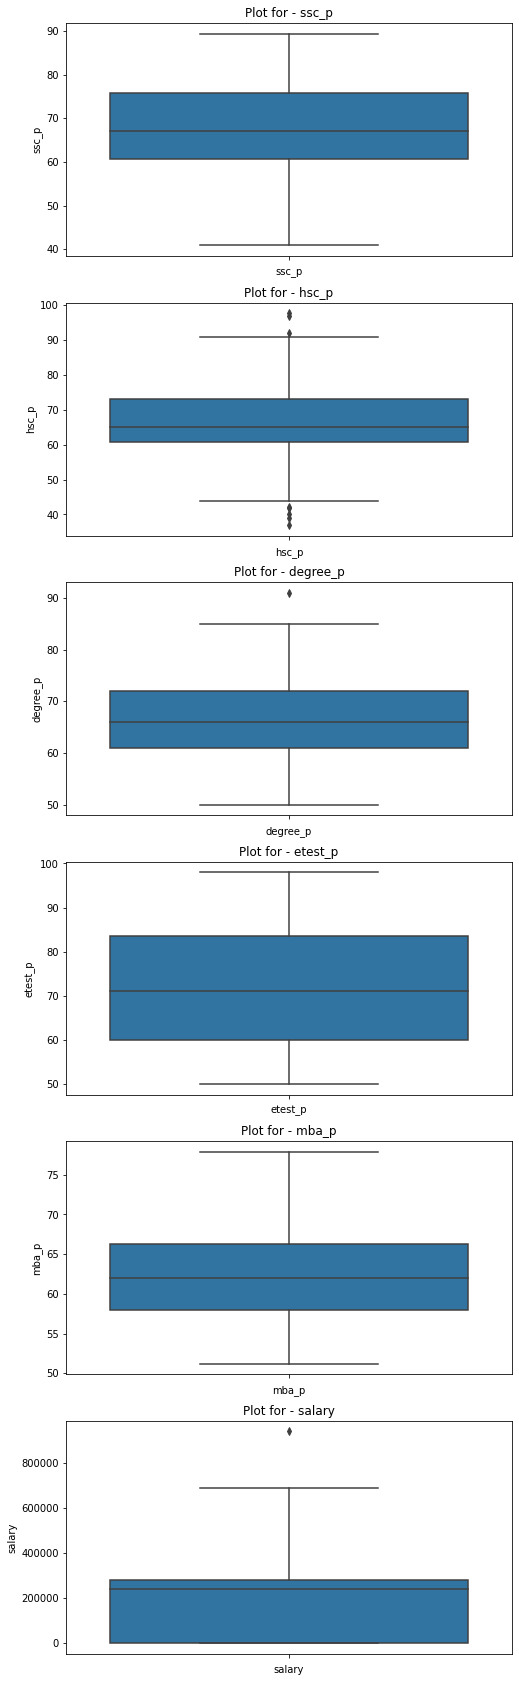

In [ ]:
# findining the outliers within the dataset.
# using the numerical columns.

num = ['ssc_p','hsc_p','degree_p','etest_p','mba_p','salary']
fig, ax = plt.subplots(len(num), figsize=(8,30))

for i, values in enumerate(num):
    sns.boxplot(y=df[values], ax=ax[i])
    ax[i].set_title(f'Plot for - {values}')
    ax[i].set_xlabel(values)
plt.show()

In [ ]:
# Dealing with outliers
#
# Import stats from scipy library
from scipy import stats

num = ['ssc_p','hsc_p','degree_p','etest_p','mba_p','salary']

for i, col in enumerate(num):
  z = np.abs(stats.zscore(df[col]))
print(z)

[0.46171105 0.00840351 0.33219461 1.28676089 1.46546345 1.28676089
 1.28676089 0.34514625 0.20915399 1.28676089 0.39695283 0.33219461
 1.28676089 0.1249683  1.28676089 0.00840351 0.65598571 1.28676089
 1.28676089 0.2415331  0.42933194 1.25823715 1.04453502 0.65598571
 1.04453502 1.28676089 0.26743639 0.42933194 0.9797768  1.28676089
 0.33219461 1.28676089 0.51351762 0.39695283 1.28676089 0.65598571
 1.28676089 0.78550214 0.26743639 1.37480194 0.57180002 1.28676089
 1.28676089 0.65598571 0.00840351 1.28676089 1.28676089 0.0343068
 0.33219461 1.28676089 0.00840351 1.28676089 1.28676089 1.627359
 0.11201666 0.13791995 0.26743639 1.04453502 0.4487594  0.42933194
 0.39695283 0.65598571 0.26743639 1.28676089 0.26743639 1.28676089
 0.49409016 0.49409016 1.28676089 0.49409016 1.04453502 0.26743639
 0.26743639 0.1249683  0.8891153  1.28676089 0.20267817 1.9511501
 0.46171105 1.28676089 0.26743639 0.65598571 1.28676089 0.65598571
 0.65598571 1.3035679  0.13791995 1.28676089 0.07316173 0.07316173

In [ ]:
# Removing the outliers
# Confirming that our outliers have been dropped from the dataset.
#
df_new = df[(z < 2.5)]
print(f"Original dataset size : {df.shape[0]}")
print(f"New dataframe size: {df_new.shape[0]}")

Original dataset size : 215
New dataframe size: 212


In [ ]:
# drop serial number column since its not needed for our analysis

df_new.drop('sl_no', axis = 1, inplace=True)

df_new.columns

Index(['gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s', 'degree_p',
       'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p', 'status',
       'salary'],
      dtype='object')

In [ ]:
# Removing White Space from both columns and rows and converting case to lower case

df_new.columns = df_new.columns.str.strip().str.replace('','').str.lower()

cat = ['gender', 'ssc_b', 'hsc_b', 'hsc_s', 
       'degree_t', 'workex', 'specialisation', 'status'] 

for i, c in enumerate(cat):
  df_new[c] = df_new[c].str.strip().str.replace('','').str.lower()


# Exploratory analysis


**Univariate analysis**

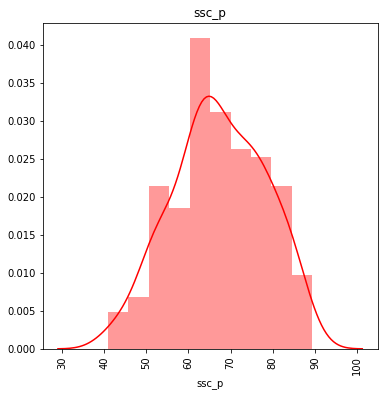

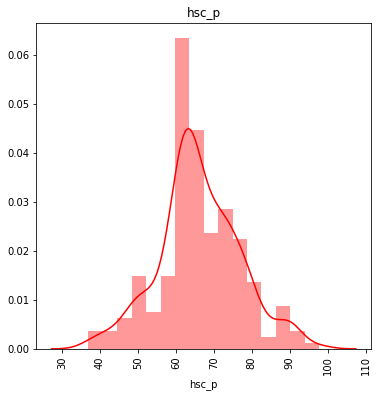

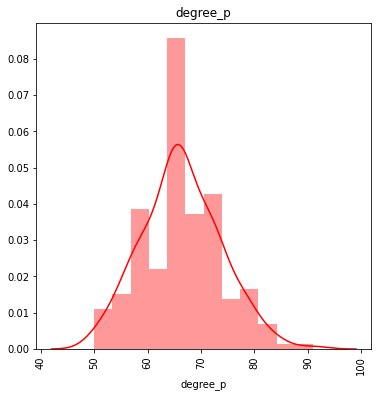

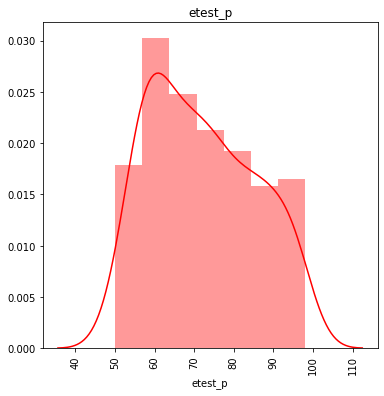

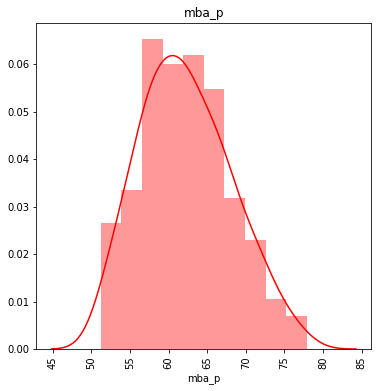

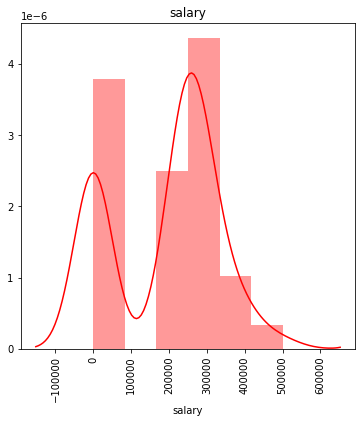

In [ ]:
# Plot bar plot for  Numerical Columns

num= ['ssc_p','hsc_p','degree_p','etest_p','mba_p','salary']

for i, n in enumerate(num):
  plt.figure(figsize=(6,6))
  sns.distplot(df_new[n] ,color = 'red' )
  plt.xticks(rotation = 90)
  plt.title(n)

# Most numerical columns are normaly distributed except salary
# A salary of Zero indicates that the student have not been placed

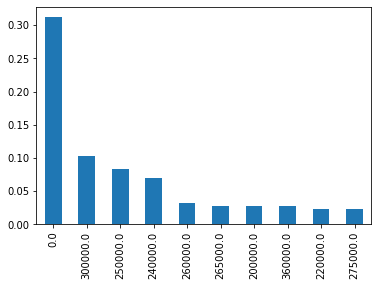

In [ ]:
# Plotting a bar graph of salary distribution
(df_new['salary'].value_counts().head(10) / len(df)).plot.bar()

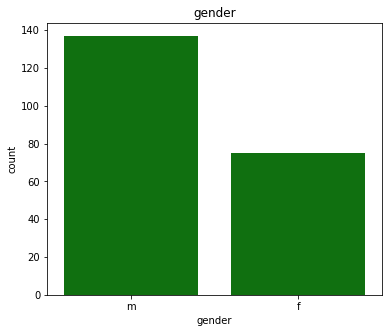

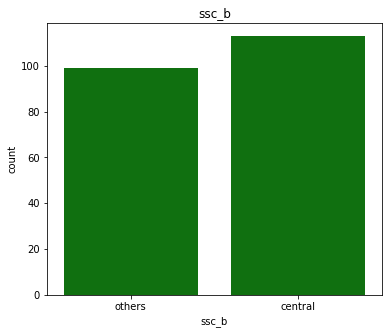

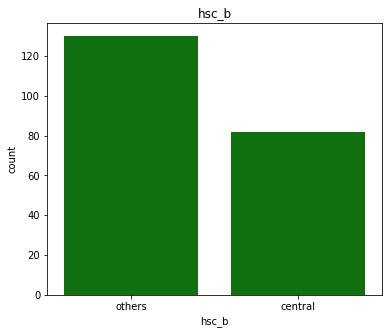

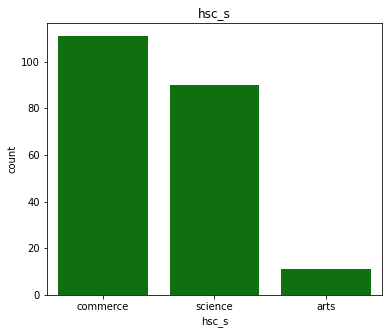

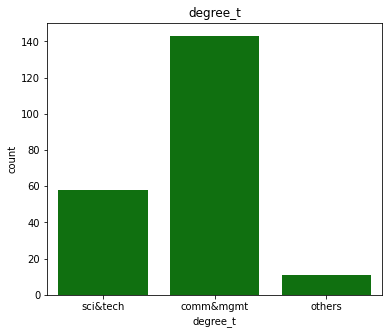

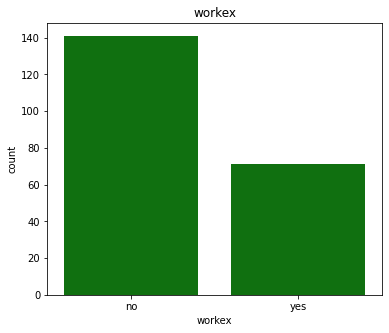

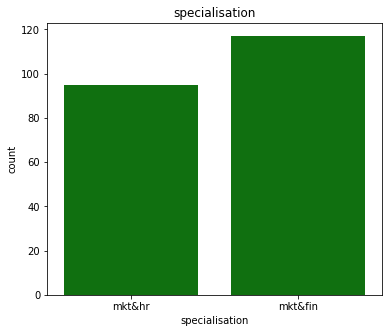

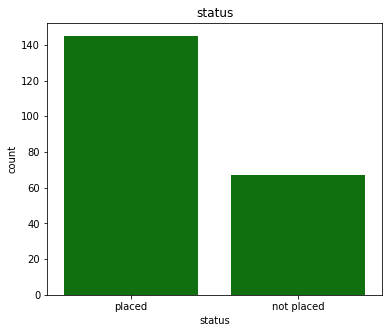

In [ ]:
# Value count for Categorical columns
df_new.columns
['ssc_p','hsc_p','degree_p','etest_p','mba_p','salary']

cat = ['gender', 'ssc_b', 'hsc_b', 'hsc_s', 
       'degree_t', 'workex', 'specialisation', 'status'] 

for i, c in enumerate(cat):
  plt.figure(figsize=(6,5))
  sns.countplot(df_new[c], color='green', orient='v')
  plt.title(c)

# The visuals below show the value counts of categoricl columns



*   A majority of the students are placed (65%)
*   Most students have specialised in marketing and finance
*   Above 60% of the students do not have work experience






**Bivariate analysis**

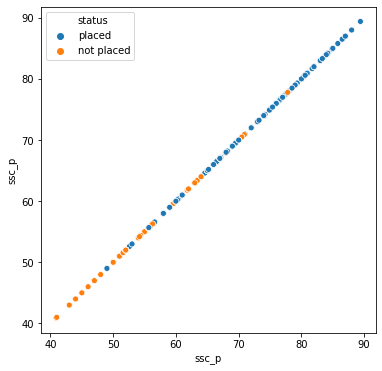

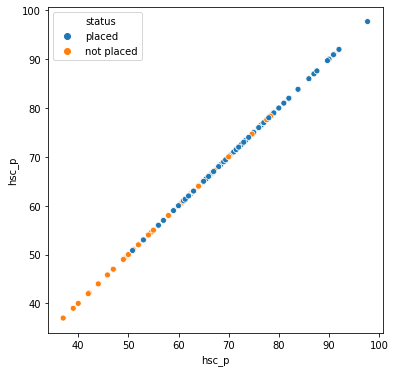

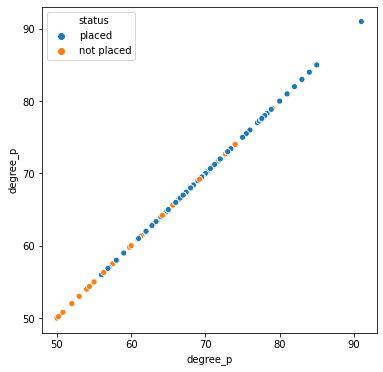

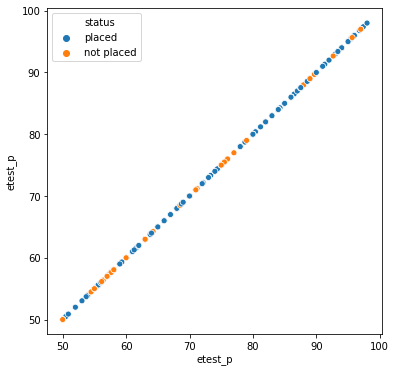

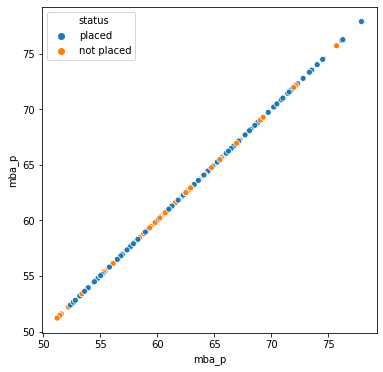

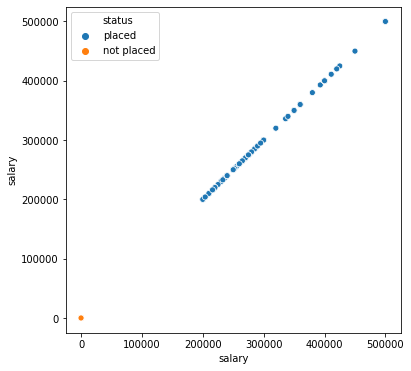

In [ ]:
# Relationship between numerical columns and status
# PLOT SCATTER PLOT FOR NUMERICAL COLUMNS
num= ['ssc_p','hsc_p','degree_p','etest_p','mba_p','salary']

for i, n in enumerate(num):
  plt.figure(figsize=(6,6))
  sns.scatterplot(df_new[n], df_new[n], hue = df_new['status'] )



*   Most features have a linear relationship with the status field




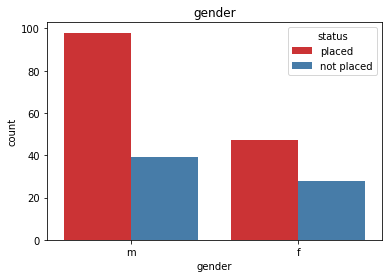

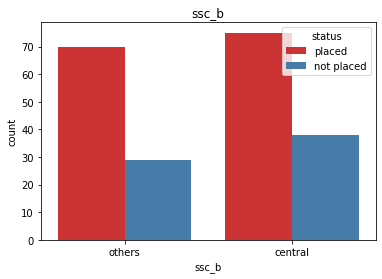

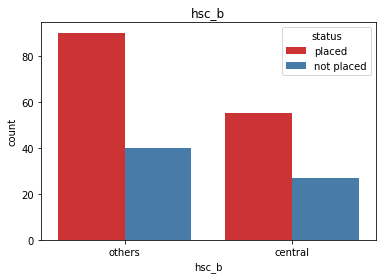

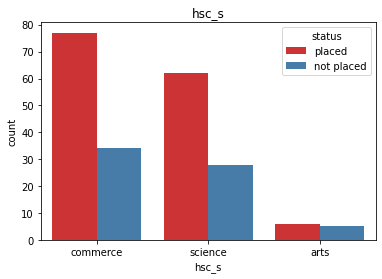

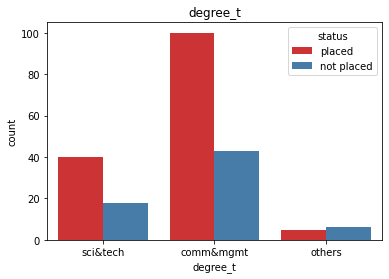

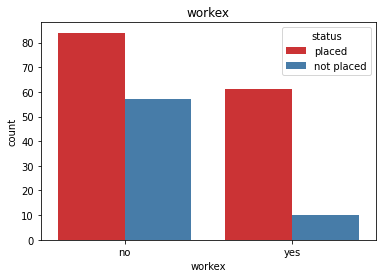

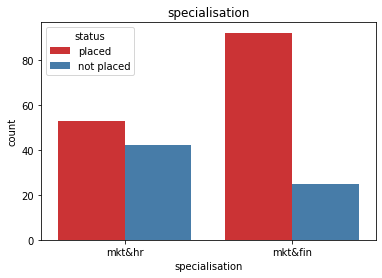

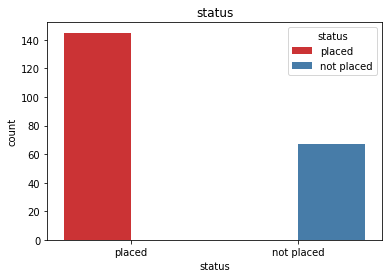

In [ ]:
# Relationship betweeen status and categorical columns

cat = ['gender', 'ssc_b', 'hsc_b', 'hsc_s', 
       'degree_t', 'workex', 'specialisation', 'status']

for i, c in enumerate(cat):
  plt.figure(figsize=(6,4))
  sns.countplot(df_new[c], color='green', hue=df_new['status'], palette='Set1')
  plt.title(c)



*   Generally most students were already placed in the job market
*   A large percentage of students with a degree specialisation of others were not placed 



In [ ]:
# Convert categotical columns to numerical
# Import LabelEncoder

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cat = ['gender', 'ssc_b', 'hsc_b', 'hsc_s', 
       'degree_t', 'workex', 'specialisation', 'status'] 

for i, c in enumerate(cat):
  df_new[c] = le.fit_transform(df_new[c])
df_new.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1,270000.0
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,200000.0
2,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1,250000.0
3,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0,0.0
4,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1,425000.0


**Correlation**

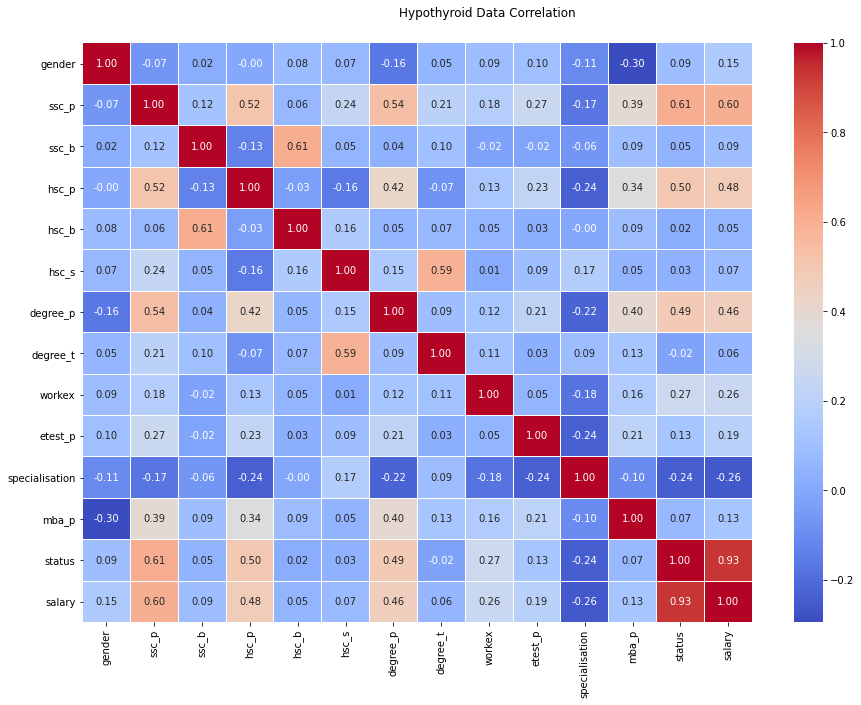

In [ ]:
# Plot a heat map for relationship between fields

corr = df_new.corr()

cor = f , ax = plt.subplots(figsize = (15,10))
cor = sns.heatmap(corr, annot = True, ax =ax , cmap = "coolwarm", fmt = '.2f',linewidths= .05)
f.subplots_adjust(top =0.93)
t = f.suptitle('Hypothyroid Data Correlation')

# 'salary', 'ssc_p', 'degree_p', 'hsc_p', 'workex' are positively correlated to status

**Multivariate analysis**

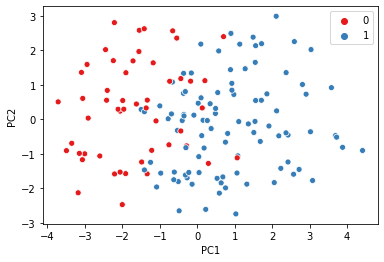

In [ ]:
# Use LDA for multivariate analysis

X = df_new[['gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s', 'degree_p',
       'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p', 'salary']].values
y = df_new['status'].values

# Split into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 50)

# Feature Scaling
# ---
# Before making any actual predictions, it is always a good practice to scale the features 
# so that all of them can be uniformly evaluated.
# ---
# 

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
scaler = MinMaxScaler()
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Load Linear Discriminant Analysis 

from sklearn.decomposition import PCA
lda =  PCA(n_components=2)
x_lda = lda.fit_transform(X_train, y_train)
lda.explained_variance_ratio_

import matplotlib.pyplot as plt
import seaborn as sns
plt.xlabel('PC1')
plt.ylabel('PC2')

sns.scatterplot(x_lda[:,0], x_lda[:, 1], hue = y_train, alpha= 1, palette= 'Set1')

# Data modelling

**Feature selection**


In [ ]:
#  Check for multicolinearity

X = df_new[['gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s', 'degree_p',
       'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p', 'salary']]
correlation = X.corr()
correlation

#  Check for multicolinearity

colinear = pd.DataFrame(np.linalg.inv(correlation.values), index= (correlation.index), columns = correlation.columns)
colinear

colinear = pd.DataFrame(np.diag(colinear), index = [colinear.index], columns = {'Multicolinearity'})
colinear.sort_values(by='Multicolinearity', ascending=False)[:5]

# There are is no Multicollinearity between the fields

,Multicolinearity
ssc_p,2.385797
salary,2.024524
hsc_p,1.920772
hsc_s,1.915003
ssc_b,1.832299


In [ ]:
# Using Feature Logistic regression for feature scalling
# Import Logistic regression Regression

from sklearn.linear_model import LogisticRegression

# Devide dataset into features and Labels
independent = df_new[['gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s', 'degree_p',
       'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p', 'salary']]

X = df_new[['gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s', 'degree_p',
       'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p', 'salary']]
y = df_new['status']

# Feature Scalling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

# Train logistic regression
logreg = LogisticRegression()

logreg.fit(X,y)

coefficients = pd.DataFrame(logreg.coef_.flatten(), index = ('gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s', 'degree_p',
       'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p', 'salary' ),columns={'Coefficients'})
coefficients.sort_values(by='Coefficients', ascending=False)[1:5]

# Salary is too related to status so using it in our modeling will negatively influencw our model
# Hence we will us Secondary Education percentage-10th Grade, Degree Percentage, Higher Secondary Education percentage- 12th Grade
# And workexperience for our classification

,Coefficients
ssc_p,0.873026
degree_p,0.471388
hsc_p,0.463580
workex,0.339810


**Modelling**

We will use classification models as opposed to regression because our target feature is a categorical variable

**Gaussian Naive Bayes Classifier**

In [ ]:
# Create a new dataset that will be used for the model

df_model = df_new[['status', 'ssc_p', 'degree_p', 'hsc_p', 'workex']]
df_model.head()

,status,ssc_p,degree_p,hsc_p,workex
0,1,67.00,58.00,91.00,0
1,1,79.33,77.48,78.33,1
2,1,65.00,64.00,68.00,0
3,0,56.00,52.00,52.00,0
4,1,85.80,73.30,73.60,0


In [ ]:
# Split dataset into Features and Targets

X = df_model[['ssc_p', 'degree_p', 'hsc_p', 'workex']].values
y = df_model['status']

# Split data into Train and Test Sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 50)

# Train the Model

from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

# And now we assess the errors
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)*100)  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred)*100)  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)*100))
print("*********************************************************************")

# Printing the scores
from sklearn.metrics import confusion_matrix,accuracy_score, precision_score, recall_score, f1_score
print("Accuracy score for GB:",metrics.accuracy_score(y_test, y_pred)*100)
print("Precision score for GB:",metrics.precision_score(y_test, y_pred)*100)
print("Recall score for GB:",metrics.recall_score(y_test, y_pred)*100)
print("Fscore",metrics.f1_score(y_test, y_pred)*100)


Mean Absolute Error: 20.930232558139537
Mean Squared Error: 20.930232558139537
Root Mean Squared Error: 4.57495710997814
*********************************************************************
Accuracy score for GB: 79.06976744186046
Precision score for GB: 95.83333333333334
Recall score for GB: 74.19354838709677
Fscore 83.63636363636364


Predicted   0   1
Actual           
0          11   1
1           8  23


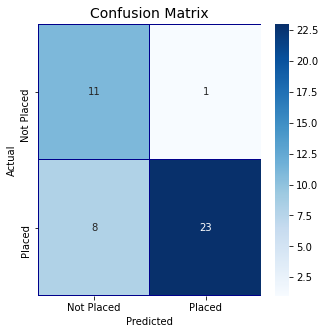

In [ ]:
# Plotting confusion matrix
cm = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
print(cm)
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Placed', 'Placed'],
            yticklabels=['Not Placed', 'Placed'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

**The accuracy is 79% while the F score is 83.6%**

**Random forest classifier**

In [ ]:
# Split dataset into Features and Targets

X =  df_model[['ssc_p', 'degree_p', 'hsc_p', 'workex']].values
y = df_model['status']

# Split into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 50)


# Import the Model
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

# Using GridSearchCV to find the best Parameters

from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(clf, {'n_estimators': [500,600,700], 'min_samples_split':np.arange(4,10,2), 'max_depth':np.arange(2,10)},cv = 5)
grid.fit(X_train, y_train)
print(grid.best_params_)

KeyboardInterrupt: ignored

In [ ]:
# Train the Model

rclf = RandomForestClassifier(n_estimators=500, min_samples_split=8, max_depth=4)
rclf.fit(X_train, y_train)
y_pred = rclf.predict(X_test)

from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test, y_pred))
confusion_matrix(y_test, y_pred)

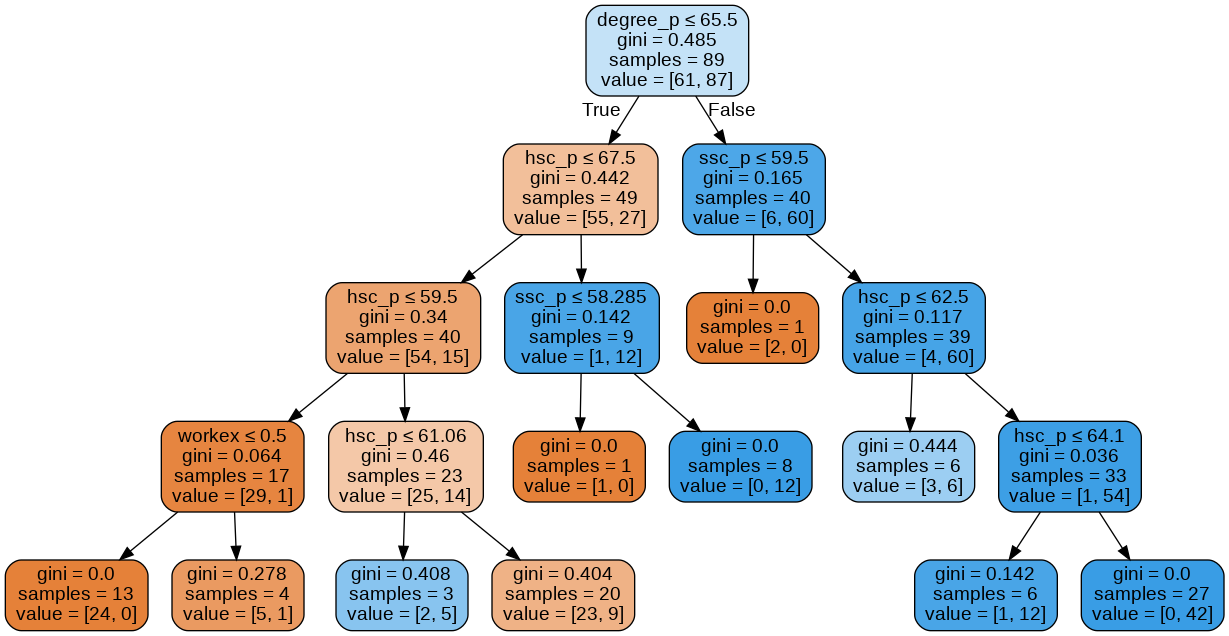

In [ ]:
# Visualize tree

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
tree = rclf.estimators_[50]
export_graphviz(tree, out_file=dot_data, filled=True, rounded=True, special_characters = True, feature_names=['ssc_p', 'degree_p', 'hsc_p', 'workex'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('placement.png')
Image(graph.create_png())

The random Forest gave us our highest accuracy of 92% using n_estimators=500, min_samples_split=8, max_depth=4 hyperparameters

**Usinf K Nearest Neighbor Classifier (KNN)**

In [ ]:
# Split dataset into Features and Targets

X = df_model[['ssc_p', 'degree_p', 'hsc_p', 'workex']].values
y = df_model['status'].values

# To avoid over-fitting, we will divide our dataset into training and test splits, 
# which gives us a better idea as to how our algorithm performed during the testing phase. 
# This way our algorithm is tested on un-seen data
# ---
# 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# Feature Scaling
# ---
# Before making any actual predictions, it is always a good practice to scale the features 
# so that all of them can be uniformly evaluated.
# ---
# 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Import the KNeighborsClassifier class from the sklearn.neighbors library.
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()

# Using GridSearchCV to find the best Parameters

from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(classifier, {'n_neighbors': np.arange(3,11)},cv = 5)
grid.fit(X_train, y_train)
print(grid.best_params_)

{'n_neighbors': 9}


In [ ]:
# We train the Model

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=6)
classifier.fit(X_train, y_train)

# The final step is to make predictions on our test data

y_pred = classifier.predict(X_test)

# Evaluating the Algorithm
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 9  3]
 [ 2 29]]
              precision    recall  f1-score   support

           0       0.82      0.75      0.78        12
           1       0.91      0.94      0.92        31

    accuracy                           0.88        43
   macro avg       0.86      0.84      0.85        43
weighted avg       0.88      0.88      0.88        43



KNeighbors Classifier gave us our lowest accuracy score of 77%, using the value of k as 6

**Using SVM**

In [ ]:
# Split dataset into Features and Targets

X = df_model[['ssc_p', 'degree_p', 'hsc_p', 'workex']].values
y = df_model['status'].values

# Applying the reduction algorithm: PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(X)
X = pca.transform(X)


# To avoid over-fitting, we will divide our dataset into training and test splits, 
# which gives us a better idea as to how our algorithm performed during the testing phase. 
# This way our algorithm is tested on un-seen data
# ---
# 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# Preprocess data
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
mm.fit(X_train)
X_train = mm.transform(X_train)
X_test = mm.transform(X_test)

# Building the model 
from sklearn.svm import SVC
clf = SVC()

# Using GridSearchCV to find the best Parameters

from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(clf, {'C': np.arange(0.001,0.1), 'kernel':['rbf', 'poly', 'linear'],'degree':[3,4]}, cv = 5 )
grid.fit(X_train, y_train)
print(grid.best_params_)

{'C': 0.001, 'degree': 4, 'kernel': 'poly'}


In [ ]:
# We train the Model

classifier = SVC(C= 0.001, kernel='poly', degree=4)
classifier.fit(X_train, y_train)

# The final step is to make predictions on our test data

y_pred = classifier.predict(X_test)

# Evaluating the Algorithm
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 7  7]
 [ 1 28]]
              precision    recall  f1-score   support

           0       0.88      0.50      0.64        14
           1       0.80      0.97      0.88        29

    accuracy                           0.81        43
   macro avg       0.84      0.73      0.76        43
weighted avg       0.82      0.81      0.80        43



SVM gave us our second highest score of 86% using C of 0.001, 4 degrees of freedom and Poly Kernel

# Conclusion